In [2]:
# Author: Varun Patrpo
# Advisor: Dr. Danieli Bianchi, Daniel Clements
# Institution: UCLA Department of Atmospheric and Oceanic Sciences

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [4]:
from scipy.io import loadmat
mat = loadmat(r'/Users/varunpatro/Desktop/OBEG/ammonia_grid.mat')

In [5]:
data = mat['nh4']
mdtype = data.dtype
ndata = {n: data[n][0, 0] for n in mdtype.names}
nh4_concs = (((ndata['res1p0'])[0,0])[0])
counts = (((ndata['res1p0'])[0,0])[1])

In [6]:
# creating a on array for each degree on earth, each depth band, each month of the year
nh4_concs.shape

(360, 180, 102, 12)

In [7]:
# saving months 
months = [None] * 12
for i in range(12):
    months[i] = nh4_concs[:,:,:,i]
print(months[0].shape)

month_counts = [None] * 12
for i in range(12):
    month_counts[i] = counts[:,:,:,i]
print(month_counts[0].shape)
print(len(month_counts))

(360, 180, 102)
(360, 180, 102)
12


In [8]:
# building columns of data frame

lat_pts = np.linspace(-89.5,90.5,180,False)
lat_col = []

for i in range(360):
    lat_col.append(lat_pts)
        
lat_col = [item for sublist in lat_col for item in sublist]
print('flattened version of 360 lattitude columns (final LH column in df)): ', len(lat_col))

lon_pts = np.linspace(-179.5, 180.5, 360, False)

lon_col = []
for i in range(360):
    for j in range(180):
        lon_col.append(lon_pts[i])
print('each long coord 180 times (final RH column in df)): ', len(lon_col))

flattened version of 360 lattitude columns (final LH column in df)):  64800
each long coord 180 times (final RH column in df)):  64800


In [9]:
df = pd.DataFrame({'lat':lat_col})
df['lon'] = lon_col
print(df.columns)
months = np.array(months)
month_counts = np.array(month_counts)
print(type(months))
month_names = [None, None, None, None, None, None, None, None, None, None, None, None]
print(months.shape)
print(month_counts.shape)

Index(['lat', 'lon'], dtype='object')
<class 'numpy.ndarray'>
(12, 360, 180, 102)
(12, 360, 180, 102)


In [10]:
# RECORD KEEPING:

# months is an array of hshape: 12, 360, 180, 102
# first index is month of year, second is longitude, third is lattitude, final is depth

In [11]:
# taking the index of the month and the FIRST depth band
jan_depth_1 = months[0,:,:,0]
feb_depth_1 = months[1,:,:,0]
mar_depth_1 = months[2,:,:,0]
apr_depth_1 = months[3,:,:,0]
may_depth_1 = months[4,:,:,0]
jun_depth_1 = months[5,:,:,0]
jul_depth_1 = months[6,:,:,0]
aug_depth_1 = months[7,:,:,0]
sep_depth_1 = months[8,:,:,0]
octo_depth_1 = months[9,:,:,0]
nov_depth_1 = months[10,:,:,0]
dec_depth_1 = months[11,:,:,0]

In [12]:
jan_depth_1_counts = month_counts[0,:,:,0]
feb_depth_1_counts = month_counts[1,:,:,0]
mar_depth_1_counts = month_counts[2,:,:,0]
apr_depth_1_counts = month_counts[3,:,:,0]
may_depth_1_counts = month_counts[4,:,:,0]
jun_depth_1_counts = month_counts[5,:,:,0]
jul_depth_1_counts = month_counts[6,:,:,0]
aug_depth_1_counts = month_counts[7,:,:,0]
sep_depth_1_counts = month_counts[8,:,:,0]
octo_depth_1_counts = month_counts[9,:,:,0]
nov_depth_1_counts = month_counts[10,:,:,0]
dec_depth_1_counts = month_counts[11,:,:,0]

In [13]:
print(mar_depth_1.shape)
print(mar_depth_1_counts.shape)

(360, 180)
(360, 180)


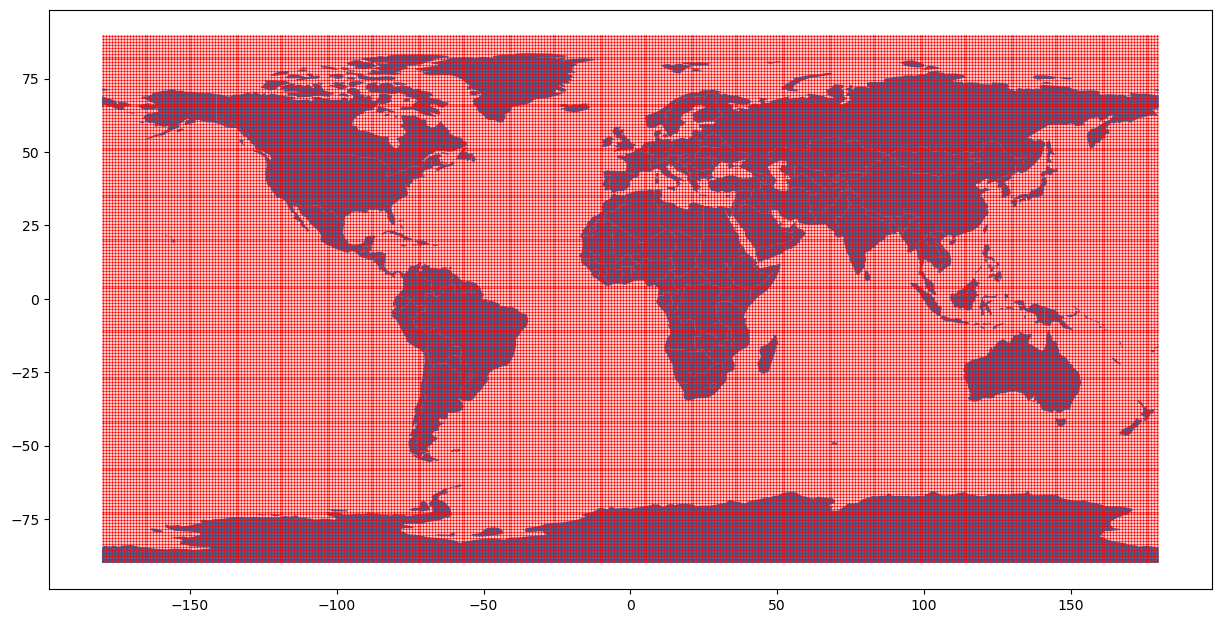

In [14]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (15,15)), marker = 'o', color = 'red', markersize = 0.5);

In [15]:
# combining all the depth_1 grids into a single list containing grids for each month of the year
depth_1 = [jan_depth_1, feb_depth_1, mar_depth_1, apr_depth_1, may_depth_1, jun_depth_1, \
           jul_depth_1, aug_depth_1, sep_depth_1, octo_depth_1, nov_depth_1, dec_depth_1]

In [16]:
depth_1_counts = [jan_depth_1_counts, feb_depth_1_counts, mar_depth_1_counts, apr_depth_1_counts, may_depth_1_counts, jun_depth_1_counts, \
           jul_depth_1_counts, aug_depth_1_counts, sep_depth_1_counts, octo_depth_1_counts, nov_depth_1_counts, dec_depth_1_counts]

In [17]:
from mpl_toolkits.basemap import Basemap

In [18]:
# Resolved over Thanksgiving 2022
# have the grid laid out, have the arrays, now just need to correctly map the array to the grid
# I can figure it out, just taking a bit longer than expected

In [19]:
# write a universal plotting function that will take in coordinates and an array of concentrations
# plot at 250 m below surface ~ 25th depth band potentially

In [20]:
# Next steps: Generating feature set 

# Creating the predictor script: m x n, m is number of observations, n is number of predictors
# find the indices of the ammonia that have observations (ones without Nan), save all indices
# reconstruction script to be added into directory in Poseidon

# To be done before machine learning: repeat data visualization with gridded scripts
# - ammonia vs temperature (scattered)
# - ammonia vs oxygen (scattered)

In [21]:
df

,lat,lon,geometry
0,-89.5,-179.5,POINT (-179.50000 -89.50000)
1,-88.5,-179.5,POINT (-179.50000 -88.50000)
2,-87.5,-179.5,POINT (-179.50000 -87.50000)
3,-86.5,-179.5,POINT (-179.50000 -86.50000)
4,-85.5,-179.5,POINT (-179.50000 -85.50000)
...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000)
64796,86.5,179.5,POINT (179.50000 86.50000)
64797,87.5,179.5,POINT (179.50000 87.50000)
64798,88.5,179.5,POINT (179.50000 88.50000)


In [22]:
df_counts = df.copy()

In [23]:
df_counts

,lat,lon,geometry
0,-89.5,-179.5,POINT (-179.50000 -89.50000)
1,-88.5,-179.5,POINT (-179.50000 -88.50000)
2,-87.5,-179.5,POINT (-179.50000 -87.50000)
3,-86.5,-179.5,POINT (-179.50000 -86.50000)
4,-85.5,-179.5,POINT (-179.50000 -85.50000)
...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000)
64796,86.5,179.5,POINT (179.50000 86.50000)
64797,87.5,179.5,POINT (179.50000 87.50000)
64798,88.5,179.5,POINT (179.50000 88.50000)


In [24]:
# flattening each grid to be plotted according to its coordinates
jan_depth_1_flat = jan_depth_1.ravel()
feb_depth_1_flat = feb_depth_1.ravel()
mar_depth_1_flat = mar_depth_1.ravel()
apr_depth_1_flat = apr_depth_1.ravel()
may_depth_1_flat = may_depth_1.ravel()
jun_depth_1_flat = jun_depth_1.ravel()
jul_depth_1_flat = jul_depth_1.ravel()
aug_depth_1_flat = aug_depth_1.ravel()
sep_depth_1_flat = sep_depth_1.ravel()
octo_depth_1_flat = octo_depth_1.ravel()
nov_depth_1_flat = nov_depth_1.ravel()
dec_depth_1_flat = dec_depth_1.ravel()

In [25]:
jan_depth_1_flat_counts = jan_depth_1_counts.ravel()
feb_depth_1_flat_counts = feb_depth_1_counts.ravel()
mar_depth_1_flat_counts = mar_depth_1_counts.ravel()
apr_depth_1_flat_counts = apr_depth_1_counts.ravel()
may_depth_1_flat_counts = may_depth_1_counts.ravel()
jun_depth_1_flat_counts = jun_depth_1_counts.ravel()
jul_depth_1_flat_counts = jul_depth_1_counts.ravel()
aug_depth_1_flat_counts = aug_depth_1_counts.ravel()
sep_depth_1_flat_counts = sep_depth_1_counts.ravel()
octo_depth_1_flat_counts = octo_depth_1_counts.ravel()
nov_depth_1_flat_counts = nov_depth_1_counts.ravel()
dec_depth_1_flat_counts = dec_depth_1_counts.ravel()

In [26]:
# adding 12 new columns to the data frame
df['jan_depth_1'] = jan_depth_1_flat.tolist()
df['feb_depth_1'] = feb_depth_1_flat.tolist()
df['mar_depth_1'] = mar_depth_1_flat.tolist()
df['apr_depth_1'] = apr_depth_1_flat.tolist()
df['may_depth_1'] = may_depth_1_flat.tolist()
df['jun_depth_1'] = jun_depth_1_flat.tolist()
df['jul_depth_1'] = jul_depth_1_flat.tolist()
df['aug_depth_1'] = aug_depth_1_flat.tolist()
df['sep_depth_1'] = sep_depth_1_flat.tolist()
df['octo_depth_1'] = octo_depth_1_flat.tolist()
df['nov_depth_1'] = nov_depth_1_flat.tolist()
df['dec_depth_1'] = dec_depth_1_flat.tolist()

In [29]:
# adding 12 new columns to the data frame: log of the concentrations
df['jan_log_depth_1'] = (np.log(jan_depth_1_flat)).tolist()
df['feb_log_depth_1'] = (np.log(feb_depth_1_flat)).tolist()
df['mar_log_depth_1'] = (np.log(mar_depth_1_flat)).tolist()
df['apr_log_depth_1'] = (np.log(apr_depth_1_flat)).tolist()
df['may_log_depth_1'] = (np.log(may_depth_1_flat)).tolist()
df['jun_log_depth_1'] = (np.log(jun_depth_1_flat)).tolist()
df['jul_log_depth_1'] = (np.log(jul_depth_1_flat)).tolist()
df['aug_log_depth_1'] = (np.log(aug_depth_1_flat)).tolist()
df['sep_log_depth_1'] = (np.log(sep_depth_1_flat)).tolist()
df['octo_log_depth_1'] = (np.log(octo_depth_1_flat)).tolist()
df['nov_log_depth_1'] = (np.log(nov_depth_1_flat)).tolist()
df['dec_log_depth_1'] = (np.log(dec_depth_1_flat)).tolist()

/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/548934161.py:2: RuntimeWarning: divide by zero encountered in log
  df['jan_log_depth_1'] = (np.log(jan_depth_1_flat)).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/548934161.py:3: RuntimeWarning: divide by zero encountered in log
  df['feb_log_depth_1'] = (np.log(feb_depth_1_flat)).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/548934161.py:4: RuntimeWarning: divide by zero encountered in log
  df['mar_log_depth_1'] = (np.log(mar_depth_1_flat)).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/548934161.py:5: RuntimeWarning: divide by zero encountered in log
  df['apr_log_depth_1'] = (np.log(apr_depth_1_flat)).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/548934161.py:6: RuntimeWarning: divide by zero encountered in log
  df['may_log_depth_1'] = (np.log(may_depth_1_flat)).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2z

In [27]:
# adding 12 new columns to the data frame
df_counts['jan_depth_1'] = jan_depth_1_flat_counts.tolist()
df_counts['feb_depth_1'] = feb_depth_1_flat_counts.tolist()
df_counts['mar_depth_1'] = mar_depth_1_flat_counts.tolist()
df_counts['apr_depth_1'] = apr_depth_1_flat_counts.tolist()
df_counts['may_depth_1'] = may_depth_1_flat_counts.tolist()
df_counts['jun_depth_1'] = jun_depth_1_flat_counts.tolist()
df_counts['jul_depth_1'] = jul_depth_1_flat_counts.tolist()
df_counts['aug_depth_1'] = aug_depth_1_flat_counts.tolist()
df_counts['sep_depth_1'] = sep_depth_1_flat_counts.tolist()
df_counts['octo_depth_1'] = octo_depth_1_flat_counts.tolist()
df_counts['nov_depth_1'] = nov_depth_1_flat_counts.tolist()
df_counts['dec_depth_1'] = dec_depth_1_flat_counts.tolist()

In [30]:
df_counts

,lat,lon,geometry,jan_depth_1,feb_depth_1,mar_depth_1,apr_depth_1,may_depth_1,jun_depth_1,jul_depth_1,aug_depth_1,sep_depth_1,octo_depth_1,nov_depth_1,dec_depth_1
0,-89.5,-179.5,POINT (-179.50000 -89.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-88.5,-179.5,POINT (-179.50000 -88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-179.5,POINT (-179.50000 -87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-86.5,-179.5,POINT (-179.50000 -86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-85.5,-179.5,POINT (-179.50000 -85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64796,86.5,179.5,POINT (179.50000 86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64797,87.5,179.5,POINT (179.50000 87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
64798,88.5,179.5,POINT (179.50000 88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df

,lat,lon,geometry,jan_depth_1,feb_depth_1,mar_depth_1,apr_depth_1,may_depth_1,jun_depth_1,jul_depth_1,...,mar_log_depth_1,apr_log_depth_1,may_log_depth_1,jun_log_depth_1,jul_log_depth_1,aug_log_depth_1,sep_log_depth_1,octo_log_depth_1,nov_log_depth_1,dec_log_depth_1
0,-89.5,-179.5,POINT (-179.50000 -89.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-88.5,-179.5,POINT (-179.50000 -88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-179.5,POINT (-179.50000 -87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-86.5,-179.5,POINT (-179.50000 -86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-85.5,-179.5,POINT (-179.50000 -85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64796,86.5,179.5,POINT (179.50000 86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64797,87.5,179.5,POINT (179.50000 87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64798,88.5,179.5,POINT (179.50000 88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


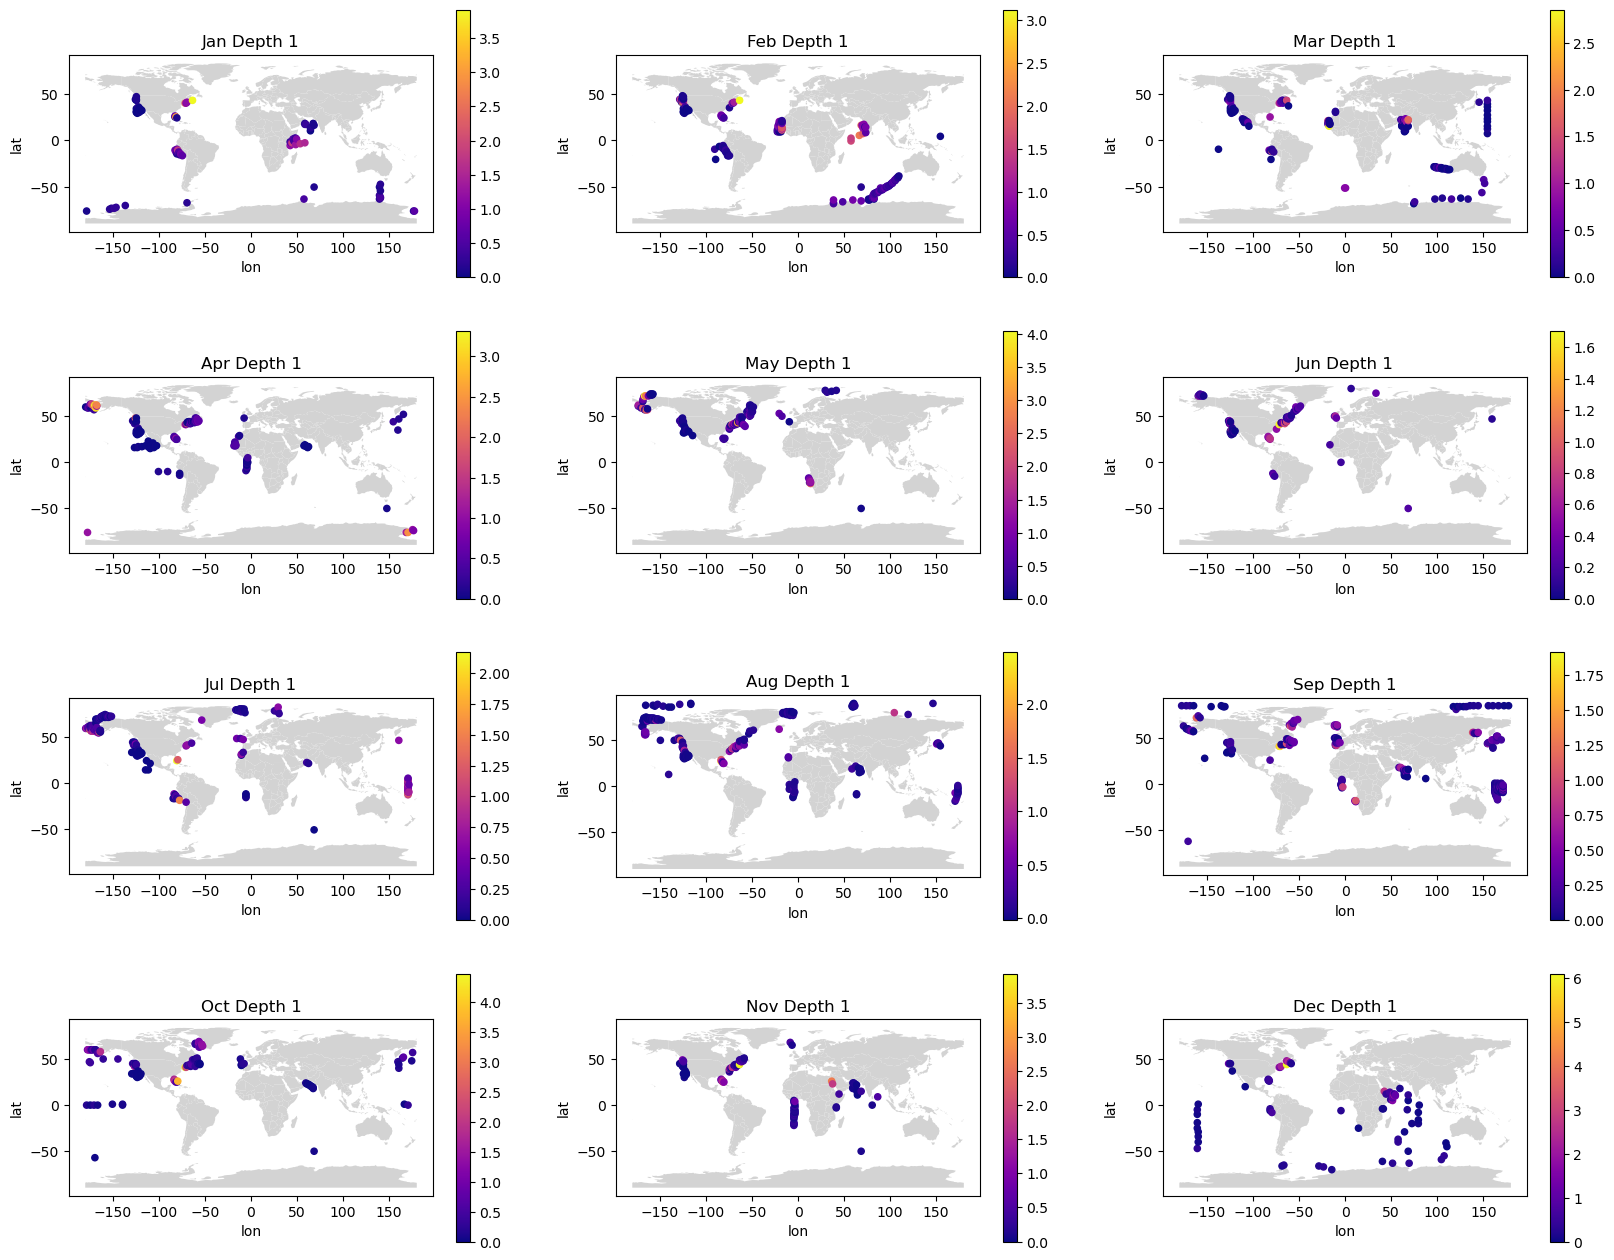

In [35]:
# plotting

# creating titles for graphs to be displayed
titles = ['Jan Depth 1', 'Feb Depth 1', 'Mar Depth 1', \
         'Apr Depth 1', 'May Depth 1', 'Jun Depth 1', \
         'Jul Depth 1', 'Aug Depth 1', 'Sep Depth 1', \
         'Oct Depth 1', 'Nov Depth 1', 'Dec Depth 1']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df.plot(x="lon", y="lat", kind="scatter", 
        c=df.iloc[:,i+3], colormap="plasma", 
        title= titles[i] , 
        ax=indices[i])
plt.show()

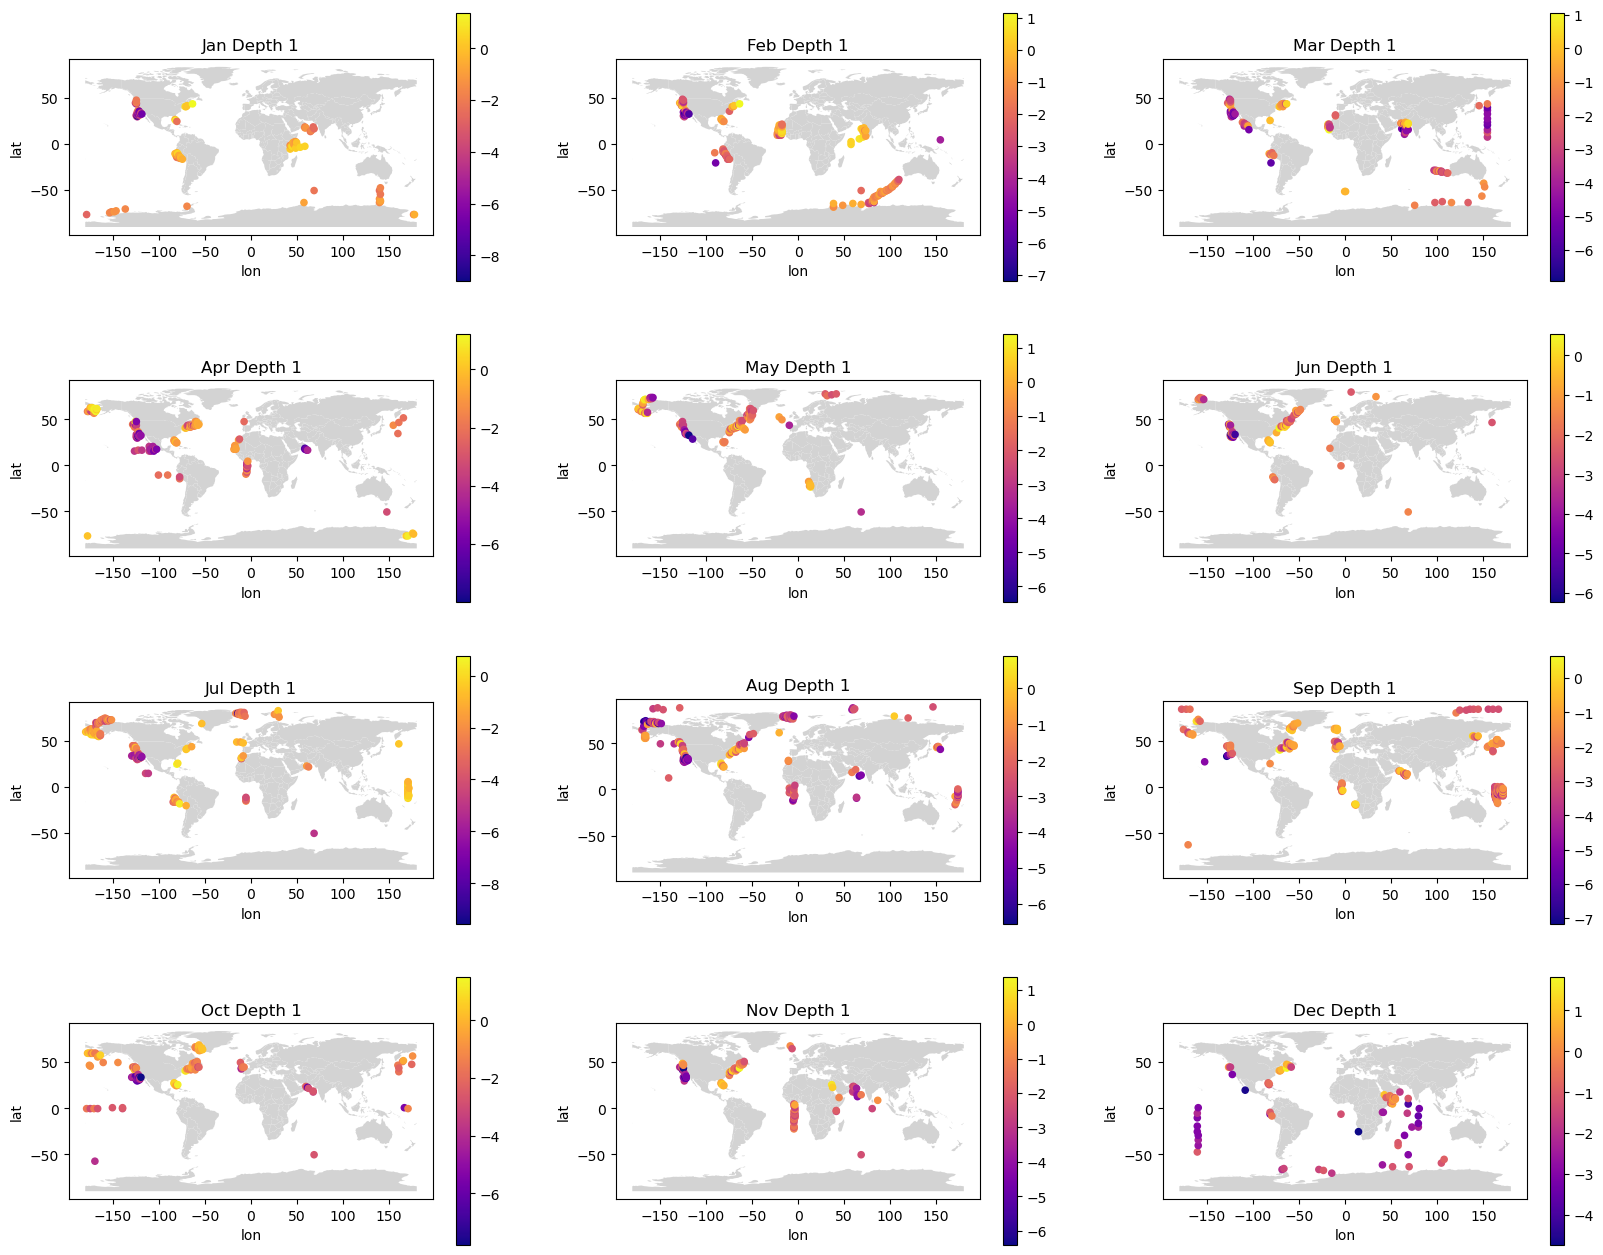

In [36]:
# plotting natural log of concentrations

# creating titles for graphs to be displayed
titles = ['Jan Depth 1', 'Feb Depth 1', 'Mar Depth 1', \
         'Apr Depth 1', 'May Depth 1', 'Jun Depth 1', \
         'Jul Depth 1', 'Aug Depth 1', 'Sep Depth 1', \
         'Oct Depth 1', 'Nov Depth 1', 'Dec Depth 1']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df.plot(x="lon", y="lat", kind="scatter", 
        c=df.iloc[:,i+15], colormap="plasma", 
        title= titles[i] , 
        ax=indices[i])
plt.show()

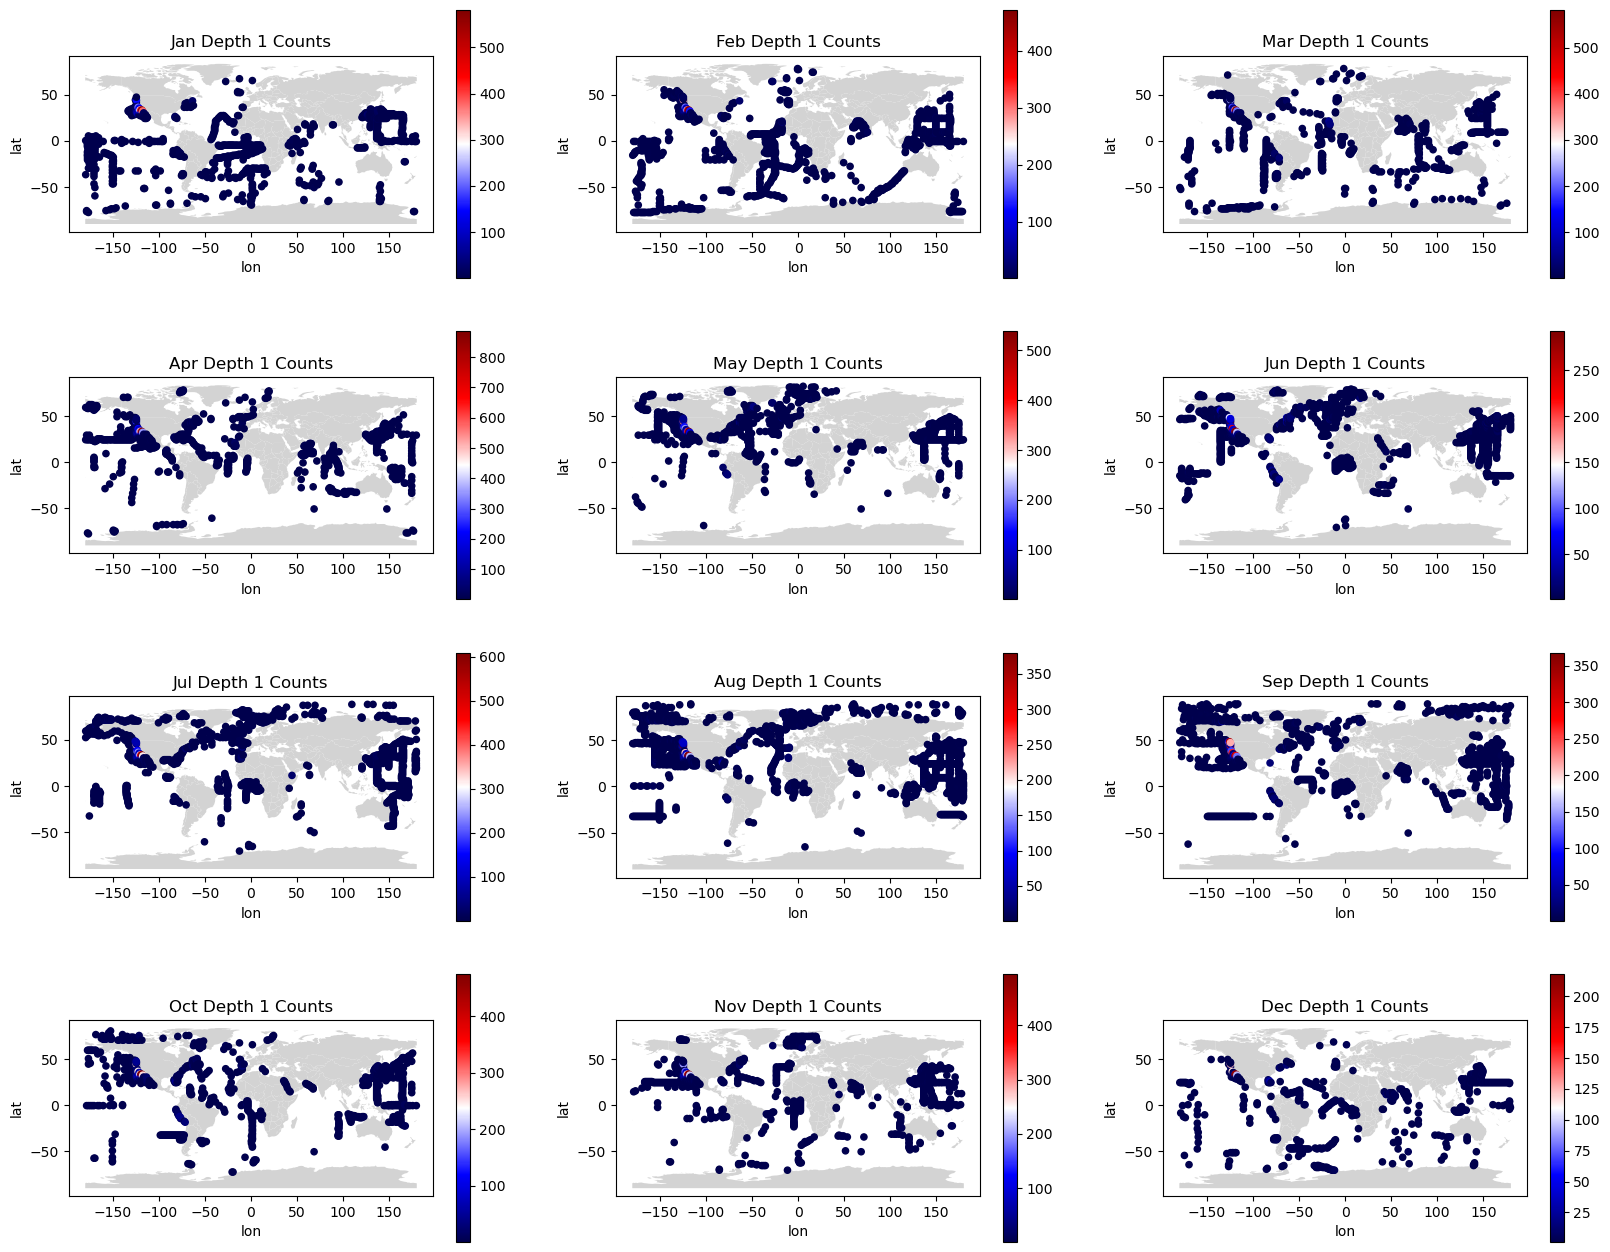

In [38]:
# plotting

# creating titles for graphs to be displayed
titles = ['Jan Depth 1 Counts', 'Feb Depth 1 Counts', 'Mar Depth 1 Counts', \
         'Apr Depth 1 Counts', 'May Depth 1 Counts', 'Jun Depth 1 Counts', \
         'Jul Depth 1 Counts', 'Aug Depth 1 Counts', 'Sep Depth 1 Counts', \
         'Oct Depth 1 Counts', 'Nov Depth 1 Counts', 'Dec Depth 1 Counts']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points
# plot log of counts axis
# discretize color bar

for i in range(12):
    df_counts.plot(x="lon", y="lat", kind="scatter", 
        c=df_counts.iloc[:,i+3], colormap="seismic", 
        title= titles[i] , 
        ax=indices[i])
plt.show()

In [35]:
months.shape

(12, 360, 180, 102)

In [39]:
#np.save(r'/Users/varunpatro/Desktop/OBEG/dataframes/nh4_grid_by_month.csv', months)

# basically saving all the concentration values for each point on earth, at each depth, each month

In [50]:
#loaded_months_array = np.load('/Users/varunpatro/Desktop/OBEG/dataframes/nh4_grid_by_month.csv.npy')

In [51]:
#loaded_months_array.shape

(12, 360, 180, 102)

In [40]:
# taking the index of the month and the 25th depth band
jan_depth_25 = months[0,:,:,24]
feb_depth_25 = months[1,:,:,24]
mar_depth_25 = months[2,:,:,24]
apr_depth_25 = months[3,:,:,24]
may_depth_25 = months[4,:,:,24]
jun_depth_25 = months[5,:,:,24]
jul_depth_25 = months[6,:,:,24]
aug_depth_25 = months[7,:,:,24]
sep_depth_25 = months[8,:,:,24]
octo_depth_25 = months[9,:,:,24]
nov_depth_25 = months[10,:,:,24]
dec_depth_25 = months[11,:,:,24]

In [41]:
jan_depth_25_counts = month_counts[0,:,:,24]
feb_depth_25_counts = month_counts[1,:,:,24]
mar_depth_25_counts = month_counts[2,:,:,24]
apr_depth_25_counts = month_counts[3,:,:,24]
may_depth_25_counts = month_counts[4,:,:,24]
jun_depth_25_counts = month_counts[5,:,:,24]
jul_depth_25_counts = month_counts[6,:,:,24]
aug_depth_25_counts = month_counts[7,:,:,24]
sep_depth_25_counts = month_counts[8,:,:,24]
octo_depth_25_counts = month_counts[9,:,:,24]
nov_depth_25_counts = month_counts[10,:,:,24]
dec_depth_25_counts = month_counts[11,:,:,24]

In [42]:
print(mar_depth_25.shape)
print(mar_depth_25_counts.shape)

(360, 180)
(360, 180)


In [43]:
# flattening each grid to be plotted according to its coordinates
jan_depth_25_flat = jan_depth_25.ravel()
feb_depth_25_flat = feb_depth_25.ravel()
mar_depth_25_flat = mar_depth_25.ravel()
apr_depth_25_flat = apr_depth_25.ravel()
may_depth_25_flat = may_depth_25.ravel()
jun_depth_25_flat = jun_depth_25.ravel()
jul_depth_25_flat = jul_depth_25.ravel()
aug_depth_25_flat = aug_depth_25.ravel()
sep_depth_25_flat = sep_depth_25.ravel()
octo_depth_25_flat = octo_depth_25.ravel()
nov_depth_25_flat = nov_depth_25.ravel()
dec_depth_25_flat = dec_depth_25.ravel()

In [46]:
flat_concs_25 = [jan_depth_25_flat, feb_depth_25_flat, mar_depth_25_flat, \
                apr_depth_25_flat, may_depth_25_flat, jun_depth_25_flat, \
                jul_depth_25_flat, aug_depth_25_flat, sep_depth_25_flat, \
                octo_depth_25_flat, nov_depth_25_flat, dec_depth_25_flat]

In [44]:
jan_depth_25_flat_counts = jan_depth_25_counts.ravel()
feb_depth_25_flat_counts = feb_depth_25_counts.ravel()
mar_depth_25_flat_counts = mar_depth_25_counts.ravel()
apr_depth_25_flat_counts = apr_depth_25_counts.ravel()
may_depth_25_flat_counts = may_depth_25_counts.ravel()
jun_depth_25_flat_counts = jun_depth_25_counts.ravel()
jul_depth_25_flat_counts = jul_depth_25_counts.ravel()
aug_depth_25_flat_counts = aug_depth_25_counts.ravel()
sep_depth_25_flat_counts = sep_depth_25_counts.ravel()
octo_depth_25_flat_counts = octo_depth_25_counts.ravel()
nov_depth_25_flat_counts = nov_depth_25_counts.ravel()
dec_depth_25_flat_counts = dec_depth_25_counts.ravel()

In [45]:
# adding 12 new columns to the data frame
df['jan_depth_25'] = jan_depth_25_flat.tolist()
df['feb_depth_25'] = feb_depth_25_flat.tolist()
df['mar_depth_25'] = mar_depth_25_flat.tolist()
df['apr_depth_25'] = apr_depth_25_flat.tolist()
df['may_depth_25'] = may_depth_25_flat.tolist()
df['jun_depth_25'] = jun_depth_25_flat.tolist()
df['jul_depth_25'] = jul_depth_25_flat.tolist()
df['aug_depth_25'] = aug_depth_25_flat.tolist()
df['sep_depth_25'] = sep_depth_25_flat.tolist()
df['octo_depth_25'] = octo_depth_25_flat.tolist()
df['nov_depth_25'] = nov_depth_25_flat.tolist()
df['dec_depth_25'] = dec_depth_25_flat.tolist()

In [47]:
# adding 12 new columns to the data frame -- log concentrations

month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'octo', 'nov', 'dec']

for i in range(12):
    df[month_names[i] + '_log_depth_25'] = (np.log(flat_concs_25[i])).tolist()


/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/3856533468.py:6: RuntimeWarning: divide by zero encountered in log
  df[month_names[i] + '_log_depth_25'] = (np.log(flat_concs_25[i])).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/3856533468.py:6: RuntimeWarning: invalid value encountered in log
  df[month_names[i] + '_log_depth_25'] = (np.log(flat_concs_25[i])).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/3856533468.py:6: RuntimeWarning: divide by zero encountered in log
  df[month_names[i] + '_log_depth_25'] = (np.log(flat_concs_25[i])).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/3856533468.py:6: RuntimeWarning: invalid value encountered in log
  df[month_names[i] + '_log_depth_25'] = (np.log(flat_concs_25[i])).tolist()
/var/folders/0_/tw3dnhmx5dqct_g6c2zwmwg80000gn/T/ipykernel_58546/3856533468.py:6: RuntimeWarning: divide by zero encountered in log
  df[month_names[i] + '_log_depth_

In [58]:
# adding 12 new columns to the data frame
df_counts['jan_depth_25'] = jan_depth_25_flat_counts.tolist()
df_counts['feb_depth_25'] = feb_depth_25_flat_counts.tolist()
df_counts['mar_depth_25'] = mar_depth_25_flat_counts.tolist()
df_counts['apr_depth_25'] = apr_depth_25_flat_counts.tolist()
df_counts['may_depth_25'] = may_depth_25_flat_counts.tolist()
df_counts['jun_depth_25'] = jun_depth_25_flat_counts.tolist()
df_counts['jul_depth_25'] = jul_depth_25_flat_counts.tolist()
df_counts['aug_depth_25'] = aug_depth_25_flat_counts.tolist()
df_counts['sep_depth_25'] = sep_depth_25_flat_counts.tolist()
df_counts['octo_depth_25'] = octo_depth_25_flat_counts.tolist()
df_counts['nov_depth_25'] = nov_depth_25_flat_counts.tolist()
df_counts['dec_depth_25'] = dec_depth_25_flat_counts.tolist()

In [51]:
df

,lat,lon,geometry,jan_depth_1,feb_depth_1,mar_depth_1,apr_depth_1,may_depth_1,jun_depth_1,jul_depth_1,...,mar_log_depth_25,apr_log_depth_25,may_log_depth_25,jun_log_depth_25,jul_log_depth_25,aug_log_depth_25,sep_log_depth_25,octo_log_depth_25,nov_log_depth_25,dec_log_depth_25
0,-89.5,-179.5,POINT (-179.50000 -89.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-88.5,-179.5,POINT (-179.50000 -88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-179.5,POINT (-179.50000 -87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-86.5,-179.5,POINT (-179.50000 -86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-85.5,-179.5,POINT (-179.50000 -85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,85.5,179.5,POINT (179.50000 85.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64796,86.5,179.5,POINT (179.50000 86.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64797,87.5,179.5,POINT (179.50000 87.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64798,88.5,179.5,POINT (179.50000 88.50000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


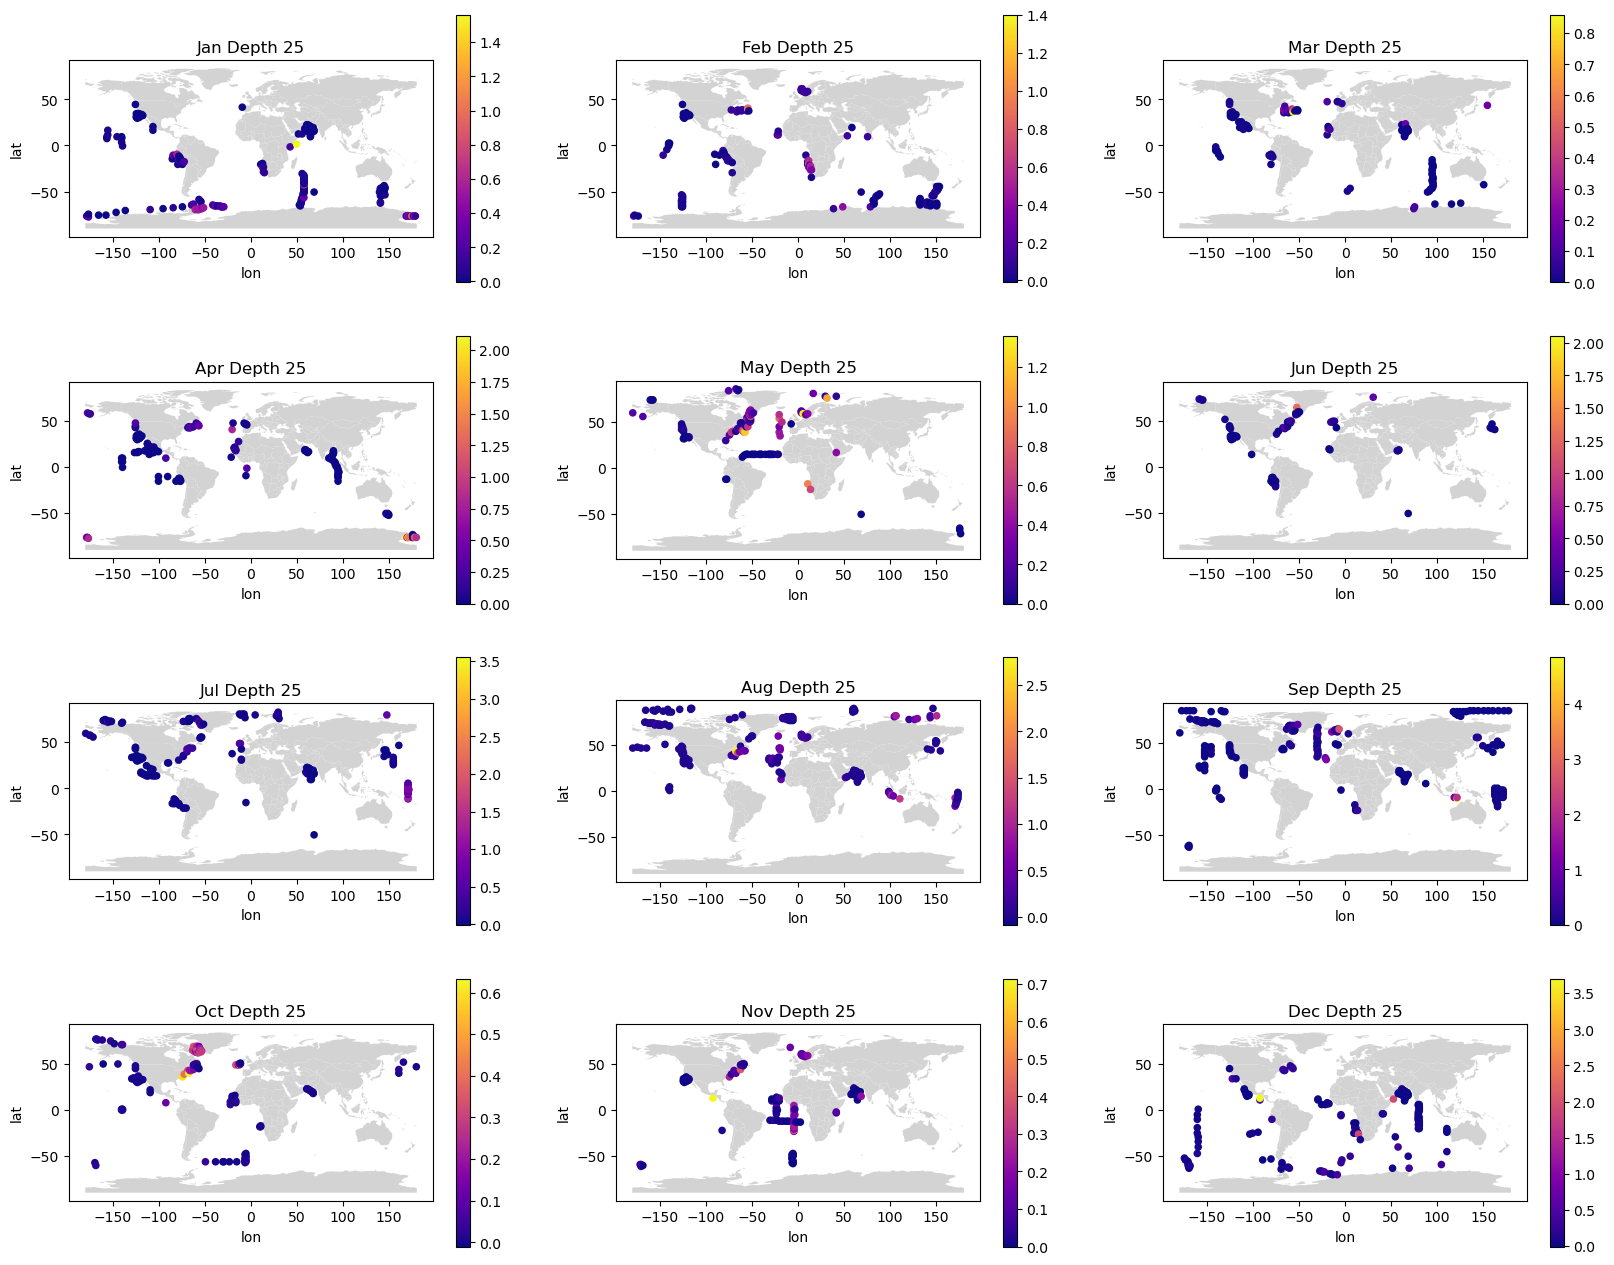

In [52]:
# plotting

# creating titles for graphs to be displayed
titles_25 = ['Jan Depth 25', 'Feb Depth 25', 'Mar Depth 25', \
         'Apr Depth 25', 'May Depth 25', 'Jun Depth 25', \
         'Jul Depth 25', 'Aug Depth 25', 'Sep Depth 25', \
         'Oct Depth 25', 'Nov Depth 25', 'Dec Depth 25']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df.plot(x="lon", y="lat", kind="scatter", 
        c=df.iloc[:,i+27], colormap="plasma", 
        title= titles_25[i] , 
        ax=indices[i])
plt.show()

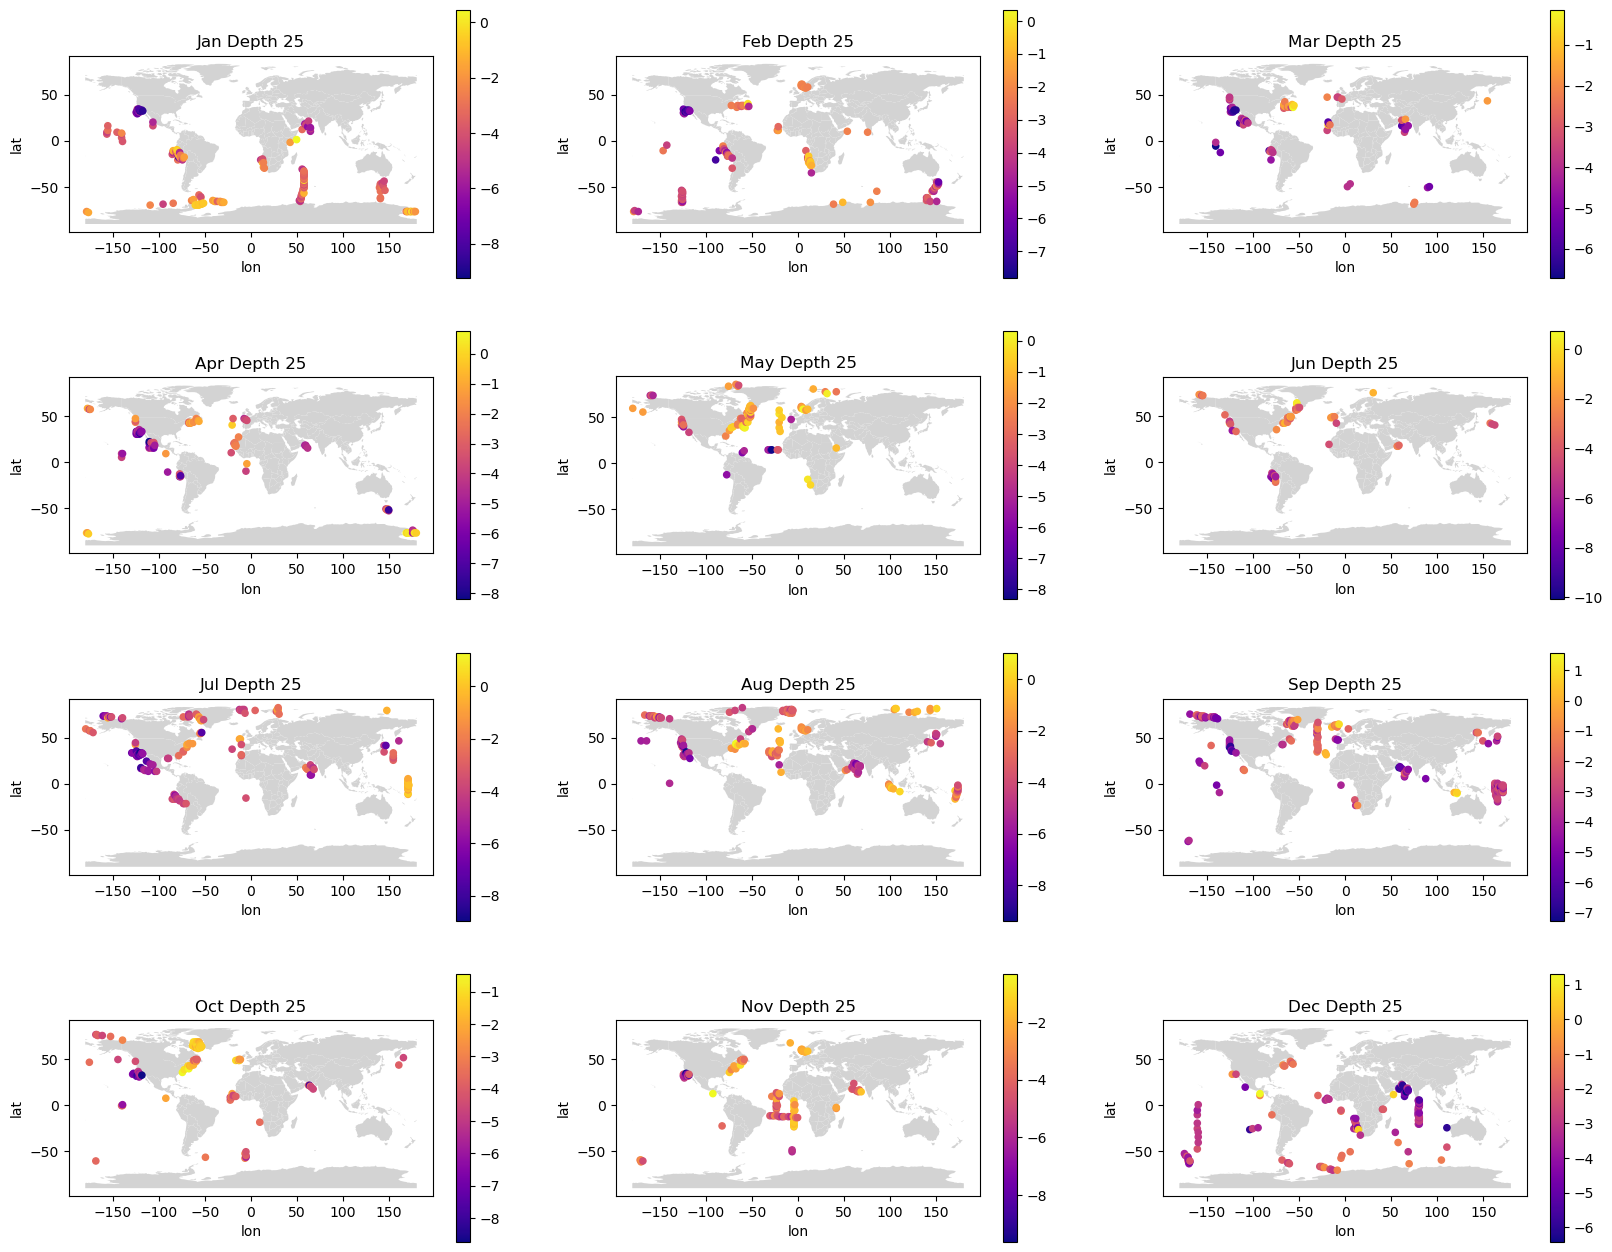

In [55]:
# plotting

# creating titles for graphs to be displayed
titles_25 = ['Jan Depth 25', 'Feb Depth 25', 'Mar Depth 25', \
         'Apr Depth 25', 'May Depth 25', 'Jun Depth 25', \
         'Jul Depth 25', 'Aug Depth 25', 'Sep Depth 25', \
         'Oct Depth 25', 'Nov Depth 25', 'Dec Depth 25']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df.plot(x="lon", y="lat", kind="scatter", 
        c=df.iloc[:,i+39], colormap="plasma", 
        title= titles_25[i] , 
        ax=indices[i])
plt.show()

In [60]:
len(df_counts.columns)

27

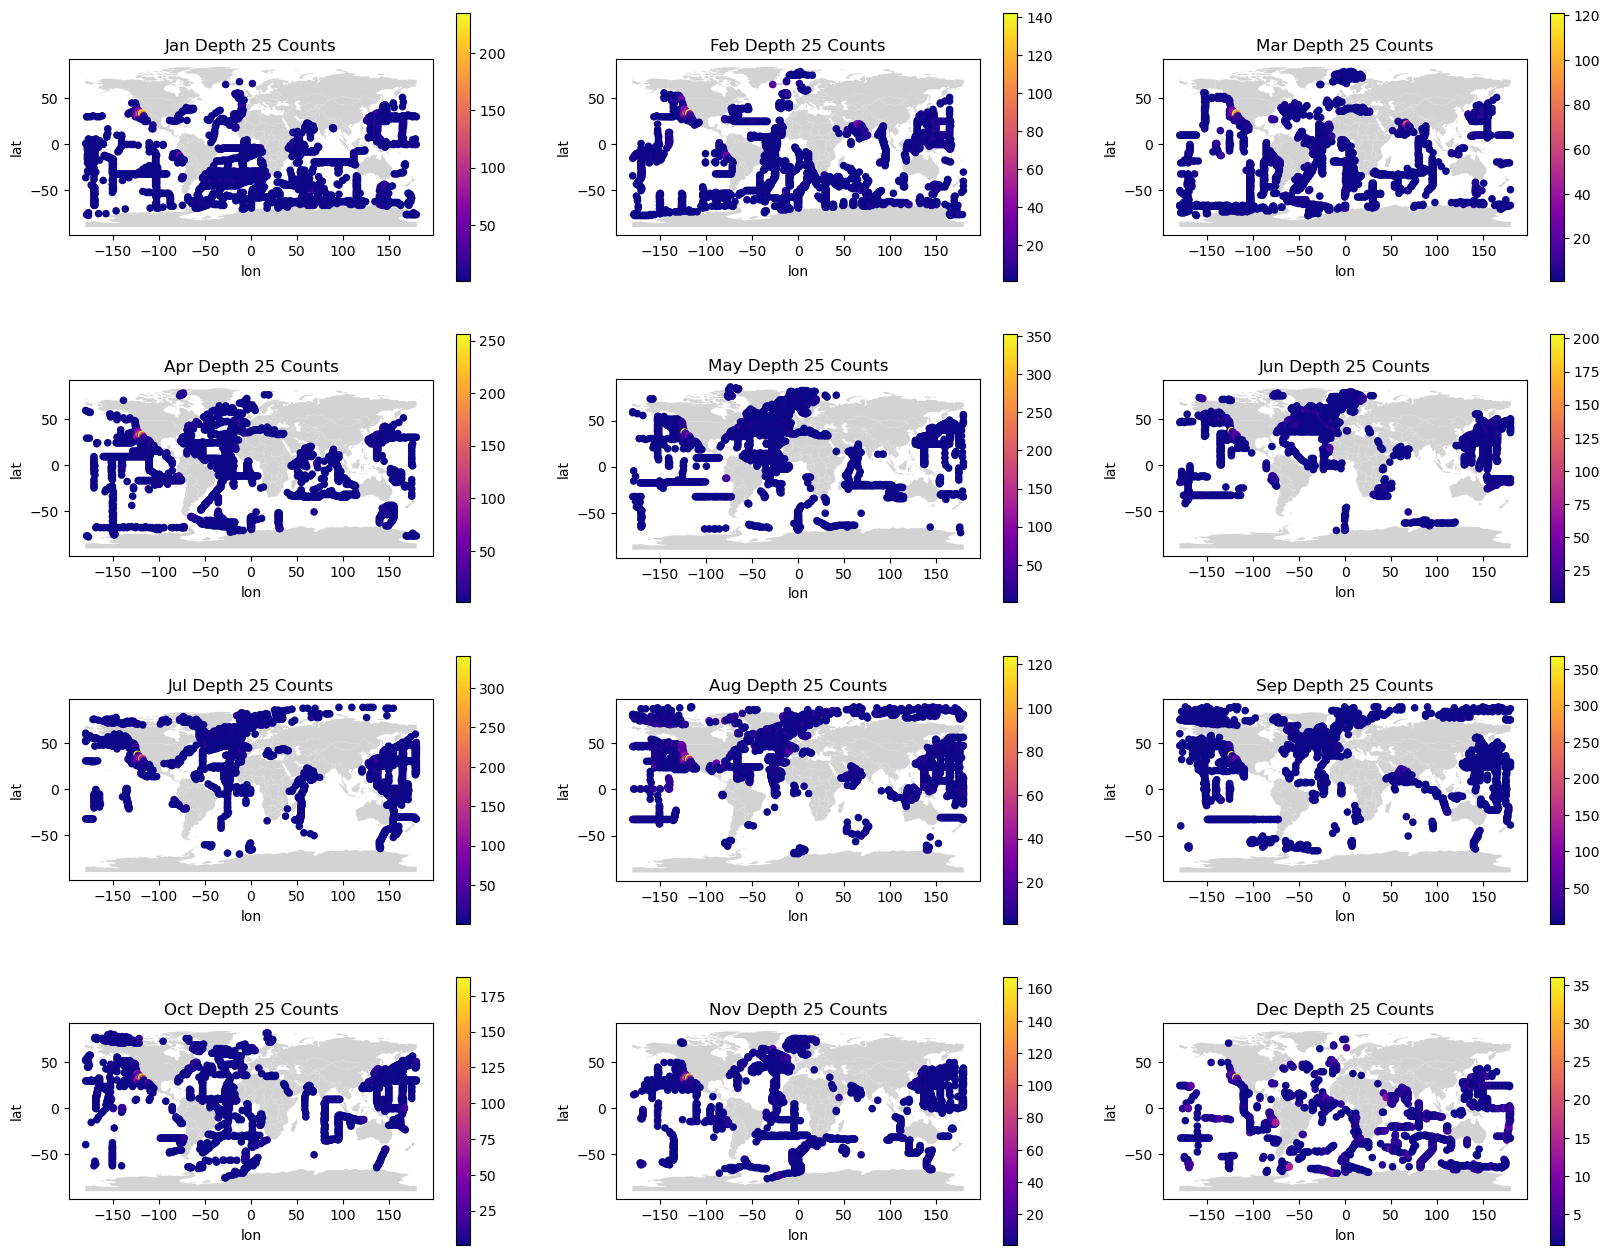

In [61]:
# plotting -- log concentrations

# creating titles for graphs to be displayed
titles_25 = ['Jan Depth 25 Counts', 'Feb Depth 25 Counts', 'Mar Depth 25 Counts', \
         'Apr Depth 25 Counts', 'May Depth 25 Counts', 'Jun Depth 25 Counts', \
         'Jul Depth 25 Counts', 'Aug Depth 25 Counts', 'Sep Depth 25 Counts', \
         'Oct Depth 25 Counts', 'Nov Depth 25 Counts', 'Dec Depth 25 Counts']

# displaying 4 rows of 3 graphs
fig, ax = plt.subplots(figsize=(20,16), ncols = 3, nrows = 4, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(4):
    for j in range(3): 
        countries.plot(color="lightgrey", ax = ax[i][j])
        
indices = [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2], \
           ax[2,0], ax[2,1], ax[2,2], ax[3,0], ax[3,1], ax[3,2]]

# plot points

for i in range(12):
    df_counts.plot(x="lon", y="lat", kind="scatter", 
        c=df_counts.iloc[:,i+15], colormap="plasma", 
        title= titles_25[i] , 
        ax=indices[i])
plt.show()

In [ ]:
# set all count = 0 to NaN
# double check code